# What Inside:

**1. [objective and introduction](#)** <br>
**2. [Librarys](#)** <br>
**3. [First Look](#)** <br>
**4. [Explorations](#)** <br>
**5. [Conclusions](#)** <br>

# Objective
The objective of this analysis is to do some exploration to a better understand the patterns of Revenues and Expenditure in US Education. 

<h1>Context</h1>

<h2>Public school Revenue Sources</h2><br>
(Last Updated: March 2017)
<i>Elementary and secondary public school revenues
    totaled $632 billion in school year 2013-14. of this total, 9 percent of revenues were from federal sources, 46 percent were from state sources, and 45 percent were from local sources.</i><br>
    
In school year 2013/14 , elementary and secondry public school revenues totaled 632 billion, in constant 2015-16 dollers. 1 of this total, total, 9 percent, or 55 billion, were from federal sources; 46 percent, or 292 billion, were from state sources; and 45 percent,  or 284 billion ,were from local sources. In 2013-14, the percentage from each sources differd across the state and the District of Columbia. for example, the percentages of total revenues coming from federal, state, and local sources in Illinois were 8 percent, 26 percent, and 66 percent, respectively, while the same total revenues in Vermont were 6 percent, 90 percent, and 4 percent.

Total elementary and secondary public school revenues were 7 percent higher in 2013-14 than in 2003-04(632 billion versus 592 billion, in constant 2015-16 dollars).
During this time , total revenues rose from 592 billion in 2003-04 to $658 billion in 2007-08 and then fell each year between2008-09 and 2012-13. Total revenues then rose from 633 billion in 2012-13 to 632 billion in 2013-14. these changes were accompanied by a 3 percent increase in total elementary and secondry public school enrollment, from 49 million student in 2003-04 to 50 million students in 2013-2014(see indicator Elementary and Secondry Enrollment).<br>
    (https://nces.ed.gov/programs/coe/indicator_cma.asp)
    





<h1> Importing Librarys and data import </h2>

In [119]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category =FutureWarning)

In [120]:
# Importing dataset
df_educ = pd.read_csv(r"E:\kaggle\US education finance\elsect_summary.csv")

# First look 

In [121]:
# First look at the dataset
print(df_educ.shape)
print(df_educ.info())

(1224, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         1224 non-null   object 
 1   YEAR                          1224 non-null   int64  
 2   ENROLL                        1173 non-null   float64
 3   TOTAL_REVENUE                 1224 non-null   int64  
 4   FEDERAL_REVENUE               1224 non-null   int64  
 5   STATE_REVENUE                 1224 non-null   int64  
 6   LOCAL_REVENUE                 1224 non-null   int64  
 7   TOTAL_EXPENDITURE             1224 non-null   int64  
 8   INSTRUCTION_EXPENDITURE       1224 non-null   int64  
 9   SUPPORT_SERVICES_EXPENDITURE  1224 non-null   int64  
 10  OTHER_EXPENDITURE             1173 non-null   float64
 11  CAPITAL_OUTLAY_EXPENDITURE    1224 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 11

In [122]:
#checking the null value
df_educ.isnull().sum()

STATE                            0
YEAR                             0
ENROLL                          51
TOTAL_REVENUE                    0
FEDERAL_REVENUE                  0
STATE_REVENUE                    0
LOCAL_REVENUE                    0
TOTAL_EXPENDITURE                0
INSTRUCTION_EXPENDITURE          0
SUPPORT_SERVICES_EXPENDITURE     0
OTHER_EXPENDITURE               51
CAPITAL_OUTLAY_EXPENDITURE       0
dtype: int64

In [123]:
#how our data set looks
df_educ.head()

,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
0,Alabama,1992,NaN,2678885,304177,1659028,715680,2653798,1481703,735036,NaN,174053
1,Alaska,1992,NaN,1049591,106780,720711,222100,972488,498362,350902,NaN,37451
2,Arizona,1992,NaN,3258079,297888,1369815,1590376,3401580,1435908,1007732,NaN,609114
3,Arkansas,1992,NaN,1711959,178571,958785,574603,1743022,964323,483488,NaN,145212
4,California,1992,NaN,26260025,2072470,16546514,7641041,27138832,14358922,8520926,NaN,2044688


# Starting the Exploration 

Knowing the density distribution of the data


In [124]:
df_educ.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE
count,1224.000000,1.173000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.224000e+03,1.173000e+03,1.224000e+03
mean,2003.500000,9.160265e+05,8.924060e+06,7.555382e+05,4.139964e+06,4.028558e+06,9.037118e+06,4.674538e+06,2.631397e+06,4.231043e+05,8.944065e+05
std,6.925016,1.063425e+06,1.146065e+07,1.134900e+06,5.399466e+06,5.342740e+06,1.172569e+07,6.139830e+06,3.282216e+06,5.248700e+05,1.319977e+06
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,1.270800e+04
25%,1997.750000,2.629350e+05,2.178702e+06,1.872205e+05,1.134351e+06,7.102645e+05,2.154830e+06,1.146924e+06,6.258090e+05,1.005860e+05,1.783398e+05
50%,2003.500000,6.480840e+05,5.031386e+06,3.979885e+05,2.491838e+06,2.027902e+06,5.134935e+06,2.606185e+06,1.513362e+06,2.691570e+05,4.972200e+05
75%,2009.250000,1.009200e+06,1.062036e+07,8.165382e+05,4.833075e+06,4.683521e+06,1.057543e+07,5.521131e+06,3.129162e+06,5.105030e+05,9.633838e+05
max,2015.000000,6.307022e+06,7.824804e+07,9.990221e+06,4.318764e+07,3.494151e+07,7.836596e+07,4.195426e+07,2.350185e+07,3.759373e+06,1.022366e+07


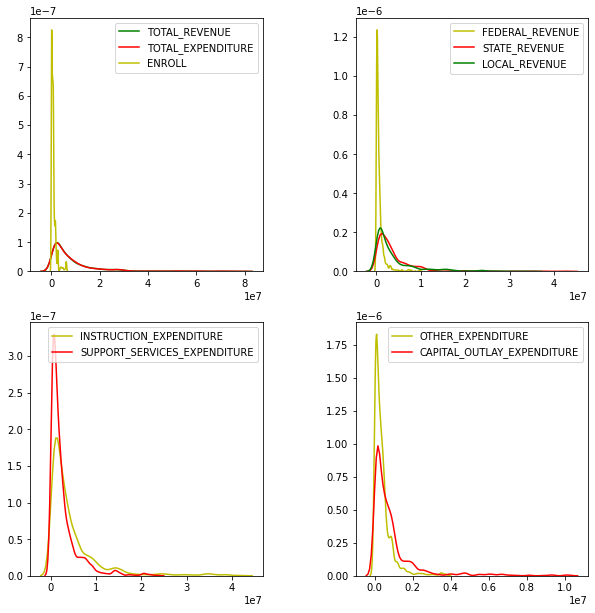

In [125]:
plt.figure(figsize =(10,10))
plt.subplot(221)
sns.kdeplot(df_educ['TOTAL_REVENUE'], color='g')
sns.kdeplot(df_educ['TOTAL_EXPENDITURE'], color = 'r')
sns.kdeplot(df_educ['ENROLL'].dropna(), color='y')

plt.subplot(222)
sns.kdeplot(df_educ['FEDERAL_REVENUE'], color = 'y')
sns.kdeplot(df_educ['STATE_REVENUE'], color ='r')
sns.kdeplot(df_educ['LOCAL_REVENUE'], color= 'g')

plt.subplot(223)
sns.kdeplot(df_educ['INSTRUCTION_EXPENDITURE'], color="y")
sns.kdeplot(df_educ['SUPPORT_SERVICES_EXPENDITURE'], color='r')

plt.subplot(224)
sns.kdeplot(df_educ['OTHER_EXPENDITURE'].dropna() ,color='y')
sns.kdeplot(df_educ['CAPITAL_OUTLAY_EXPENDITURE'] ,color='r')
plt.subplots_adjust(wspace = 0.4, hspace = 0.2,top = 0.9)
plt.show()


# Creating a new variable of 

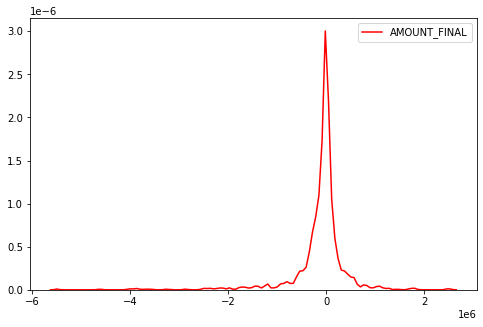

In [126]:
#(revenue - expenditure)
df_educ['AMOUNT_FINAL'] = df_educ['TOTAL_REVENUE'] - df_educ['TOTAL_EXPENDITURE']
plt.figure(figsize=(8,5))
sns.kdeplot(df_educ['AMOUNT_FINAL'], color = 'r')

In [127]:
df_educ['REGION'] = np.nan

df_educ.loc[df_educ.STATE.isin(['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 
                                'Rhode Island','Vermont','New Jersey', 'New York',
                                'Pennsylvania']), 'REGION'] = 'Northwest'

df_educ.loc[df_educ.STATE.isin(['Illinois', 'Indiana', 'Michigan', 'Ohio','Wisconsin','Iowa', 'Kansas', 
                                'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 
                                'South Dakota']), 'REGION'] = 'Midwest'

df_educ.loc[df_educ.STATE.isin(['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 
                                'South Carolina', 'Virginia','District of Columbia','West Virginia',
                                'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 
                                'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']), 'REGION'] = 'South'

df_educ.loc[df_educ.STATE.isin(['Arizona','Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 
                                'Utah','Wyoming','Alaska', 'California', 'Hawaii', 'Oregon',
                                'Washington']), 'REGION'] = 'West'

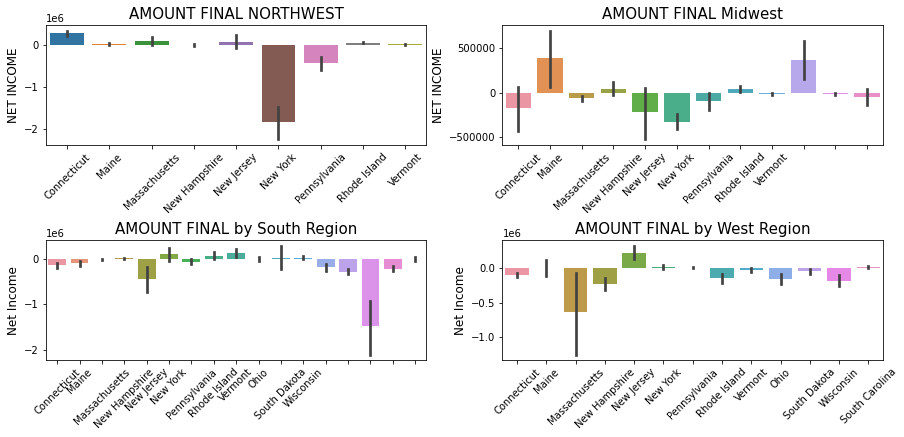

In [128]:
plt.figure(figsize=(15,6))

plt.subplot(221)
g1 =sns.barplot(x="STATE" , y="AMOUNT_FINAL", data=df_educ[df_educ["REGION"]=='Northwest'])
g1.set_xticklabels(g1.get_xticklabels() ,rotation=45)
g1.set_xlabel("",fontsize=12)
g1.set_ylabel('NET INCOME',fontsize =12)
g1.set_title("AMOUNT FINAL NORTHWEST" ,fontsize=15)

plt.subplot(222)
g2 = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=df_educ[df_educ['REGION'] == "Midwest"])
g2.set_xticklabels(g1.get_xticklabels(),rotation=45)
g2.set_title("AMOUNT FINAL Midwest", fontsize=15)
g2.set_xlabel("", fontsize=12)
g2.set_ylabel("NET INCOME", fontsize=12)

plt.subplot(2,2,3)
g3 = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=df_educ[df_educ['REGION'] == "South"])
g3.set_xticklabels(g2.get_xticklabels(),rotation=45)
g3.set_title("AMOUNT FINAL by South Region", fontsize=15)
g3.set_xlabel("", fontsize=12)
g3.set_ylabel("Net Income", fontsize=12)

plt.subplot(2,2,4)
g4 = sns.barplot(x="STATE", y="AMOUNT_FINAL",
                data=df_educ[df_educ['REGION'] == "West"])
g4.set_xticklabels(g3.get_xticklabels(),rotation=45)
g4.set_title("AMOUNT FINAL by West Region", fontsize=15)
g4.set_xlabel("", fontsize=12)
g4.set_ylabel("Net Income", fontsize=12)

plt.subplots_adjust(wspace =0.2 ,hspace =.8,top=.9)

<h2> Visual look by: </h2>
    * TOTAL REVENUE<br>
    * TOTAL EXPENDITURE<br>
    * FINAL AMOUNT
    

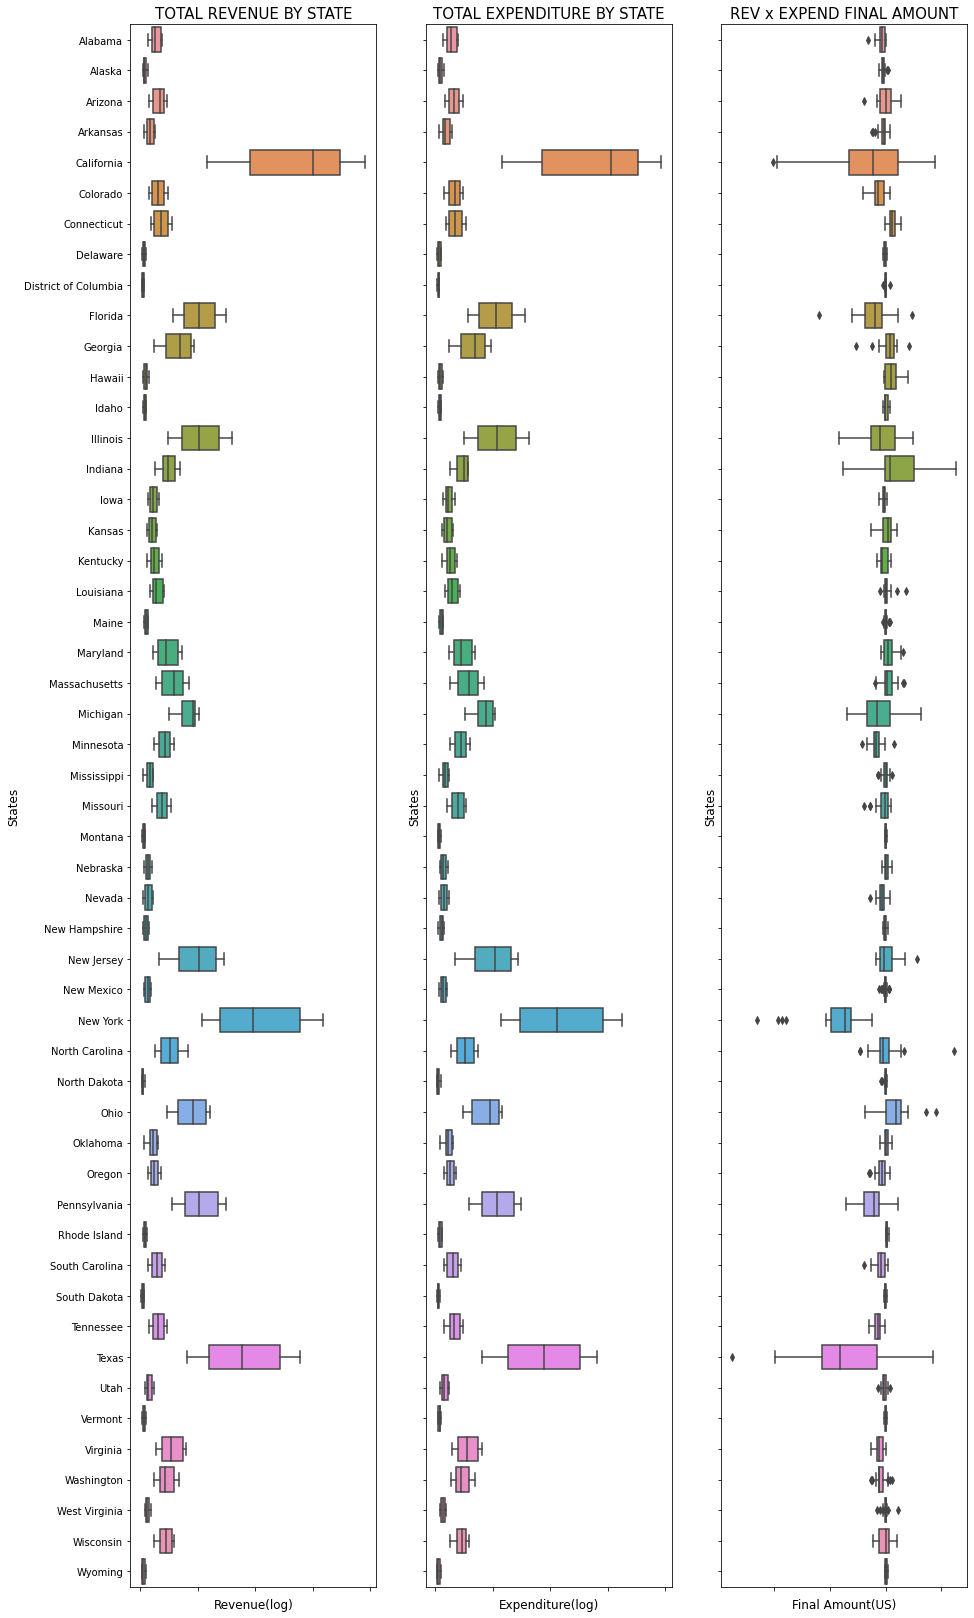

In [129]:
fig, ax = plt.subplots(1,3, sharex=False, sharey=True, 
                       figsize = (15,28))

ax = ax.flatten()

g = sns.boxplot(x="TOTAL_REVENUE",y="STATE", data=df_educ,ax=ax[0])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("TOTAL REVENUE BY STATE", fontsize=15)
g.set_xlabel("Revenue(log)", fontsize=12)
g.set_ylabel("States", fontsize=12)

g1 = sns.boxplot(x="TOTAL_EXPENDITURE",y="STATE", data=df_educ,ax=ax[1])
g1.set_xticklabels(g.get_xticklabels(),rotation=90)
g1.set_title("TOTAL EXPENDITURE BY STATE", fontsize=15)
g1.set_xlabel("Expenditure(log)", fontsize=12)
g1.set_ylabel("States", fontsize=12)

g2 = sns.boxplot(x="AMOUNT_FINAL",y="STATE",data=df_educ,ax=ax[2])
g2.set_xticklabels(g.get_xticklabels(),rotation=90)
g2.set_title("REV x EXPEND FINAL AMOUNT", fontsize=15)
g2.set_xlabel("Final Amount(US)", fontsize=12)
g2.set_ylabel("States", fontsize=12)

plt.subplots_adjust(wspace = 0.2, hspace = 0.8,top = 0.9)

plt.show()

In [130]:
state_amount_final = df_educ.groupby("STATE")['AMOUNT_FINAL'].mean()

In [131]:

print((state_amount_final > 0).sum())

21


In [132]:
len(df_educ.STATE.unique())

51

In [133]:
# 30 state have negative final amount 

# Knowing the FINAL AMOUNT by YEAR

In [134]:
year_amount_final = df_educ.groupby("YEAR")["AMOUNT_FINAL"].mean()
print("Positive final result since 92")
print((year_amount_final >0).sum())

Positive final result since 92
3


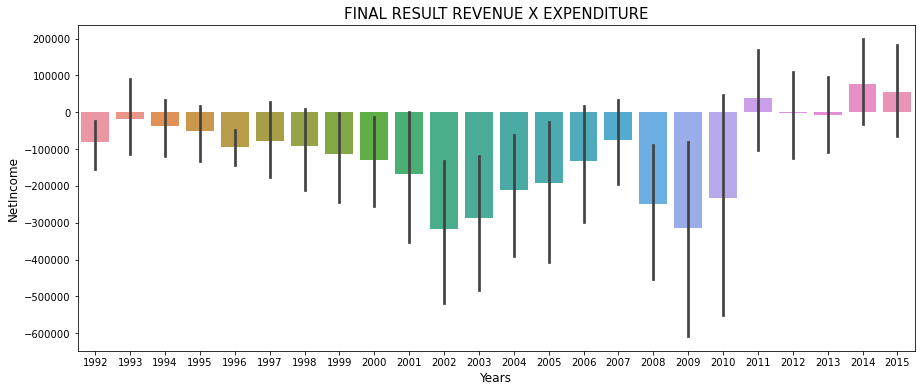

In [135]:
plt.figure(figsize =(15,6))
g = sns.barplot(x="YEAR", y ="AMOUNT_FINAL", data =df_educ)
g.set_title("FINAL RESULT REVENUE X EXPENDITURE",fontsize=15)
g.set_xlabel("Years" ,fontsize=12)
g.set_ylabel("NetIncome", fontsize =12)

plt.show()



# Let's add one column with the respective the President by Period


In [139]:
df_educ['President'] = np.nan
df_educ.loc[df_educ['YEAR'] <=2000 ,"President"]="Bill Clinton"
df_educ.loc[(df_educ["YEAR"] >2000) & (df_educ["YEAR"]<2009),"President"] = "George Bush"
df_educ.loc[df_educ["YEAR"]>=2009 ,"President"] = "Barack Obama"
df_educ['President'].value_counts()

Bill Clinton    459
George Bush     408
Barack Obama    357
Name: President, dtype: int64

In [140]:
Bill = df_educ[df_educ["President"] == "Bill Clinton"]
Bush = df_educ[df_educ["President"] == "George Bush"]
Obama = df_educ[df_educ["President"] == "Barack Obama"]

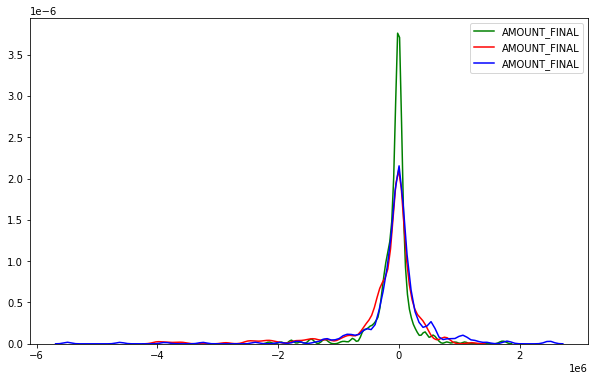

In [141]:
plt.figure(figsize = (10,6))
g = sns.kdeplot(Bill['AMOUNT_FINAL'], color='g')
g = sns.kdeplot(Bush['AMOUNT_FINAL'], color='r')
g = sns.kdeplot(Obama['AMOUNT_FINAL'], color='b')

In [142]:
# Clinton Government have better results than Bush and Obama